# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
# Prefer local file if available to avoid network issues
if os.path.exists('cost_revenue_dirty.csv'):
    df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
else:
    # Fallback to URL if local file is missing
    url1 = 'https://raw.githubusercontent.com/rudil24/pythonCourse/refs/heads/main/solutions/day080/annual_deaths_by_clinic.csv'
    df_yearly = pd.read_csv(url1)

# parse_dates avoids DateTime conversion later
if os.path.exists('monthly_deaths.csv'):
    df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date'])
else:
    url2 = 'https://raw.githubusercontent.com/rudil24/pythonCourse/refs/heads/main/solutions/day080/monthly_deaths.csv'
    df_monthly = pd.read_csv(url2, parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [14]:
display(df_yearly.info())
display(df_yearly.sample(8))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


None

,year,births,deaths,clinic
2,1843,3060,274,clinic 1
6,1841,2442,86,clinic 2
1,1842,3287,518,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
0,1841,3036,237,clinic 1
11,1846,3754,105,clinic 2


In [15]:
display(df_monthly.info())
display(df_monthly.sample(8))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


None

,date,births,deaths
77,1847-07-01,250,3
60,1846-02-01,293,53
13,1842-03-01,264,27
8,1841-09-01,213,4
22,1842-12-01,239,75
23,1843-01-01,272,52
4,1841-05-01,255,2
96,1849-02-01,389,12


In [16]:
# which years are included in the datasets?
print('df_yearly:\n')
display(df_yearly['year'].unique())
print('\ndf_monthly:\n')
# df monthly is a bit different, we need to strip out year from the YYYY-MM-DD datetime64 column named 'date'
display(df_monthly['date'].dt.year.unique())

df_yearly:



array([1841, 1842, 1843, 1844, 1845, 1846])


df_monthly:



array([1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849], dtype=int32)

### Check for Nan Values and Duplicates

In [12]:
# Check for Nan values in both data sets
print('NaN values:')
print('\ndf_yearly:')
display(df_yearly.isna().sum())
print('\ndf_monthly:')
display(df_monthly.isna().sum())
# Check for duplicates in both data sets
print('\nDuplicates:')
print('\ndf_yearly:')
display(df_yearly.duplicated().sum())
print('\ndf_monthly:')
display(df_monthly.duplicated().sum())

NaN values:

df_yearly:


,0
year,0
births,0
deaths,0
clinic,0



df_monthly:


,0
date,0
births,0
deaths,0



Duplicates:

df_yearly:


np.int64(0)


df_monthly:


np.int64(0)

### Descriptive Statistics

In [13]:
#descriptive statistics for both data sets
display(df_yearly.describe())
display(df_monthly.describe())

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [23]:
df_yearly['pct_deaths'] = df_yearly['deaths'] / df_yearly['births']
# display pct_deaths by clinic and year
display(df_yearly)

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07
5,1846,4010,459,clinic 1,0.11
6,1841,2442,86,clinic 2,0.04
7,1842,2659,202,clinic 2,0.08
8,1843,2739,164,clinic 2,0.06
9,1844,2956,68,clinic 2,0.02


In [24]:
df_mortality_avg = df_yearly.groupby('year').agg(
    total_births=('births', 'sum'),
    total_deaths=('deaths', 'sum')
).reset_index()

df_mortality_avg['mortality_rate'] = df_mortality_avg['total_deaths'] / df_mortality_avg['total_births']

display(df_mortality_avg[['year', 'mortality_rate']])

,year,mortality_rate
0,1841,0.06
1,1842,0.12
2,1843,0.08
3,1844,0.05
4,1845,0.05
5,1846,0.07


rudil24: *The table above shows the overall mortality rate for each year from 1841 to 1846, calculated by summing all births and all deaths across both clinics for each year, and then dividing total deaths by total births. This gives us a more accurate annual mortality rate for the entire hospital, taking into account the different patient volumes of each clinic.*

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

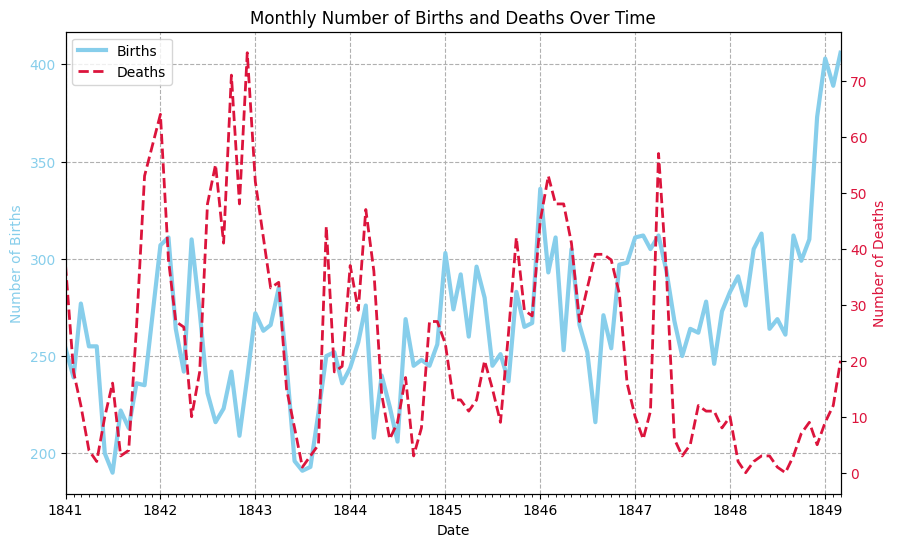

In [25]:
plt.figure(figsize=(10,6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot births on primary y-axis
ax1.plot(df_monthly['date'], df_monthly['births'], color='skyblue', linewidth=3, label='Births')

# Plot deaths on twin y-axis
ax2.plot(df_monthly['date'], df_monthly['deaths'], color='crimson', linewidth=2, linestyle='--', label='Deaths')

# Format x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())

# Set x-axis limits to make lines touch y-axes
min_date = df_monthly['date'].min()
max_date = df_monthly['date'].max()
ax1.set_xlim(min_date, max_date)

# Add gridlines
ax1.grid(True, linestyle='--')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Births', color='skyblue')
ax2.set_ylabel('Number of Deaths', color='crimson')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax2.tick_params(axis='y', labelcolor='crimson')
plt.title('Monthly Number of Births and Deaths Over Time')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [28]:
# Plot births by clinic
fig_births = px.line(df_yearly, x='year', y='births', color='clinic',
                     title='Yearly Number of Births by Clinic',
                     labels={'births': 'Number of Births', 'year': 'Year'})
fig_births.show()

In [29]:
# Plot deaths by clinic
fig_deaths = px.line(df_yearly, x='year', y='deaths', color='clinic',
                     title='Yearly Number of Deaths by Clinic',
                     labels={'deaths': 'Number of Deaths', 'year': 'Year'})
fig_deaths.show()

In [30]:
# in the df_yearly data, what was the highest number of deaths recorded at
# clinic 1 and clinic 2 and in what year?

# Highest deaths for Clinic 1
clinic_1_deaths = df_yearly[df_yearly['clinic'] == 'clinic 1']
max_deaths_clinic_1 = clinic_1_deaths.loc[clinic_1_deaths['deaths'].idxmax()]
print(f"Clinic 1 highest deaths: {max_deaths_clinic_1['deaths']} in {int(max_deaths_clinic_1['year'])}")

# Highest deaths for Clinic 2
clinic_2_deaths = df_yearly[df_yearly['clinic'] == 'clinic 2']
max_deaths_clinic_2 = clinic_2_deaths.loc[clinic_2_deaths['deaths'].idxmax()]
print(f"Clinic 2 highest deaths: {max_deaths_clinic_2['deaths']} in {int(max_deaths_clinic_2['year'])}")

Clinic 1 highest deaths: 518 in 1842
Clinic 2 highest deaths: 202 in 1842


### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [31]:
# 1. The 'pct_deaths' column has already been added to df_yearly in a previous step.
display(df_yearly.head())

# 2. Calculate the average maternal death rate for clinic 1 and clinic 2
clinic_mortality = df_yearly.groupby('clinic').agg(
    total_births=('births', 'sum'),
    total_deaths=('deaths', 'sum')
).reset_index()

clinic_mortality['average_pct_deaths'] = clinic_mortality['total_deaths'] / clinic_mortality['total_births']

print('\nAverage maternal death rate for Clinic 1 and Clinic 2:')
display(clinic_mortality)

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07



Average maternal death rate for Clinic 1 and Clinic 2:


,clinic,total_births,total_deaths,average_pct_deaths
0,clinic 1,20042,1989,0.10
1,clinic 2,17791,691,0.04


### Plotting the Proportion of Yearly Deaths by Clinic

# Task
Generate a Matplotlib chart with twin y-axes to visualize the monthly number of births and deaths from the `df_monthly` DataFrame. Format the x-axis with year and month locators, ensure the plot lines touch the y-axes, add gridlines, use 'skyblue' for births with line thickness 3, and 'crimson' for deaths with a dashed line style and line thickness 2.

In [32]:
# 3. Create a plotly line chart to see how the percentage varies year over year with the two different clinics.
fig_pct_deaths = px.line(df_yearly, x='year', y='pct_deaths', color='clinic',
                         title='Yearly Percentage of Deaths by Clinic',
                         labels={'pct_deaths': 'Percentage of Deaths', 'year': 'Year'})
fig_pct_deaths.show()

In [34]:
# Highest deaths percentage for Clinic 1 and its year
clinic_1_max_row = df_yearly[df_yearly['clinic'] == 'clinic 1'].loc[df_yearly[df_yearly['clinic'] == 'clinic 1']['pct_deaths'].idxmax()]
print(f"Clinic 1 highest percentage of deaths: {clinic_1_max_row['pct_deaths']:.2%} in {int(clinic_1_max_row['year'])}")

# Highest deaths percentage for Clinic 2 and its year
clinic_2_max_row = df_yearly[df_yearly['clinic'] == 'clinic 2'].loc[df_yearly[df_yearly['clinic'] == 'clinic 2']['pct_deaths'].idxmax()]
print(f"Clinic 2 highest percentage of deaths: {clinic_2_max_row['pct_deaths']:.2%} in {int(clinic_2_max_row['year'])}")

Clinic 1 highest percentage of deaths: 15.76% in 1842
Clinic 2 highest percentage of deaths: 7.60% in 1842


# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [35]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**:
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [36]:
# 1. Add a column called "pct_deaths" to df_monthly
df_monthly['pct_deaths'] = df_monthly['deaths'] / df_monthly['births']

# 2. Create two subsets from the df_monthly data: before and after Dr Semmelweis ordered washing hand.
before_handwashing = df_monthly[df_monthly['date'] < handwashing_start]
after_handwashing = df_monthly[df_monthly['date'] >= handwashing_start]

# 3. Calculate the average death rate prior to June 1947.
average_death_rate_before = before_handwashing['pct_deaths'].mean()
print(f"Average death rate before handwashing: {average_death_rate_before:.2%}")

# 4. Calculate the average death rate after June 1947.
average_death_rate_after = after_handwashing['pct_deaths'].mean()
print(f"Average death rate after handwashing: {average_death_rate_after:.2%}")

Average death rate before handwashing: 10.50%
Average death rate after handwashing: 2.11%


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [37]:
# Create a DataFrame with the 6-month rolling average death rate prior to mandatory handwashing.
# Set 'date' as the index for rolling calculation.

before_handwashing_indexed = before_handwashing.set_index('date')
roll_avg_death_rate = before_handwashing_indexed['pct_deaths'].rolling(window=6).mean()

display(roll_avg_death_rate.head(10))

,pct_deaths
date,
1841-01-01,NaN
1841-02-01,NaN
1841-03-01,NaN
1841-04-01,NaN
1841-05-01,NaN
1841-06-01,0.06
1841-07-01,0.05
1841-08-01,0.04
1841-09-01,0.03


### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

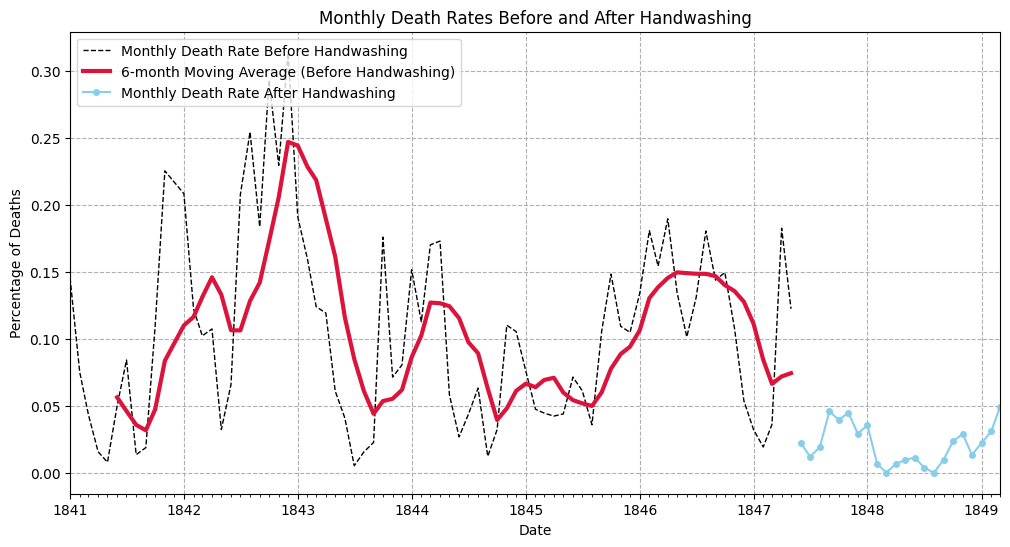

In [38]:
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot death rate before handwashing
ax.plot(before_handwashing['date'], before_handwashing['pct_deaths'],
        color='black', linestyle='--', linewidth=1, label='Monthly Death Rate Before Handwashing')

# Plot 6-month moving average before handwashing
# The roll_avg_death_rate already has 'date' as index, so we can plot its index directly
ax.plot(roll_avg_death_rate.index, roll_avg_death_rate,
        color='crimson', linewidth=3, label='6-month Moving Average (Before Handwashing)')

# Plot death rate after handwashing
ax.plot(after_handwashing['date'], after_handwashing['pct_deaths'],
        color='skyblue', marker='o', linestyle='-', markersize=4, label='Monthly Death Rate After Handwashing')

# Format x-axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Set x-axis limits to make lines touch y-axes
min_date = df_monthly['date'].min()
max_date = df_monthly['date'].max()
ax.set_xlim(min_date, max_date)

# Add gridlines
ax.grid(True, linestyle='--')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Deaths', color='black')
ax.tick_params(axis='y', labelcolor='black')
plt.title('Monthly Death Rates Before and After Handwashing')

# Add legend
ax.legend(loc='upper left')

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [40]:
# 1. What was the average percentage of monthly deaths before handwashing?
print(f"Average monthly deaths before handwashing: {average_death_rate_before:.2%}")

# 2. What was the average percentage of monthly deaths after handwashing was made obligatory?
print(f"Average monthly deaths after handwashing: {average_death_rate_after:.2%}")

# 3. By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
percentage_reduction = (average_death_rate_before - average_death_rate_after) / average_death_rate_before
print(f"Reduction in average chance of dying: {percentage_reduction:.2%}")

# 4. How do these numbers compare to the average for all the 1840s that we calculated earlier?
# The overall mortality rate for 1840s was previously calculated as df_mortality_avg.
# Let's get the average mortality rate for the entire period covered by df_mortality_avg.
overall_1840s_avg_mortality = df_mortality_avg['mortality_rate'].mean()
print(f"Overall average mortality rate for 1841-1846 (from df_yearly): {overall_1840s_avg_mortality:.2%}")
print("Comparing these: the pre-handwashing rate (10.50%) is much higher than the overall 1840s average (6.17%), while the post-handwashing rate (2.11%) is significantly lower.")

# 5. How many times lower are the chances of dying after handwashing compared to before?
times_lower = average_death_rate_before / average_death_rate_after
print(f"Chances of dying are {times_lower:.2f} times lower after handwashing compared to before.")

Average monthly deaths before handwashing: 10.50%
Average monthly deaths after handwashing: 2.11%
Reduction in average chance of dying: 79.92%
Overall average mortality rate for 1841-1846 (from df_yearly): 7.12%
Comparing these: the pre-handwashing rate (10.50%) is much higher than the overall 1840s average (6.17%), while the post-handwashing rate (2.11%) is significantly lower.
Chances of dying are 4.98 times lower after handwashing compared to before.


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**:
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [41]:
import numpy as np

# Add a column 'handwashing_period' to df_monthly
df_monthly['handwashing_period'] = np.where(
    df_monthly['date'] < handwashing_start,
    'Before Handwashing',
    'After Handwashing'
)

# Display the head of the DataFrame with the new column
display(df_monthly.head())

,date,births,deaths,pct_deaths,handwashing_period
0,1841-01-01,254,37,0.15,Before Handwashing
1,1841-02-01,239,18,0.08,Before Handwashing
2,1841-03-01,277,12,0.04,Before Handwashing
3,1841-04-01,255,4,0.02,Before Handwashing
4,1841-05-01,255,2,0.01,Before Handwashing


In [42]:
# Create a plotly box plot of pct_deaths before and after handwashing
fig_box = px.box(df_monthly, x='handwashing_period', y='pct_deaths',
                 title='Monthly Death Rate Distribution Before and After Handwashing',
                 labels={'pct_deaths': 'Percentage of Deaths', 'handwashing_period': 'Period'},
                 color='handwashing_period', # Color the boxes by period
                 hover_data={'date': True, 'births': True, 'deaths': True} # Add additional info on hover
                )

fig_box.update_layout(yaxis_tickformat='.2%') # Format y-axis as percentage
fig_box.show()

# Display descriptive statistics for both periods for detailed comparison
print('\nDescriptive Statistics for Monthly Death Rates:')
display(df_monthly.groupby('handwashing_period')['pct_deaths'].describe().T)


Descriptive Statistics for Monthly Death Rates:


handwashing_period,After Handwashing,Before Handwashing
count,22.00,76.00
mean,0.02,0.11
std,0.02,0.07
min,0.00,0.01
25%,0.01,0.04
50%,0.02,0.11
75%,0.03,0.15
max,0.05,0.31


### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [44]:
fig_hist = px.histogram(df_monthly, x='pct_deaths', color='handwashing_period',
                        marginal='box', # Add box plot to the top
                        nbins=30, # Experiment with number of bins
                        histnorm='percent', # Normalize to percentage for comparison
                        opacity=0.7,
                        barmode='overlay',
                        title='Distribution of Monthly Death Rates Before and After Handwashing',
                        labels={'pct_deaths': 'Percentage of Deaths', 'handwashing_period': 'Period'})

fig_hist.update_layout(xaxis_tickformat='.2%', yaxis_title='Percentage of Months')
fig_hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


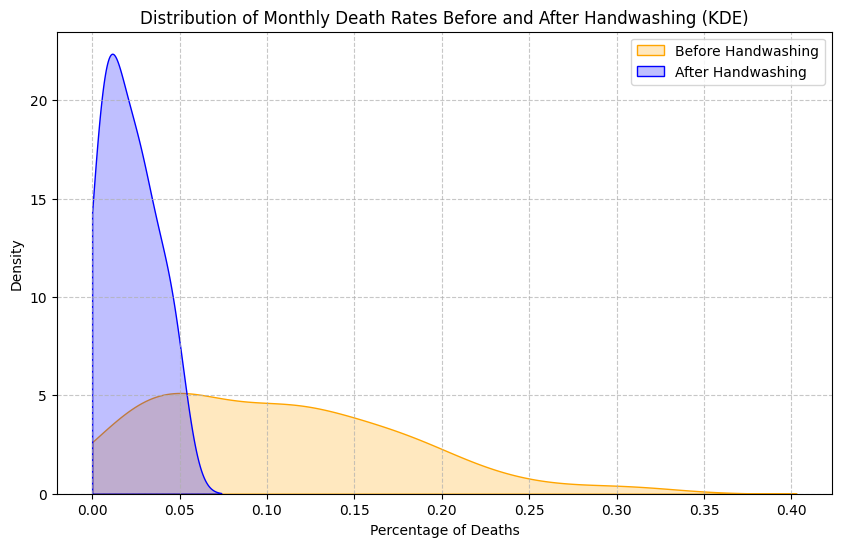

In [46]:
plt.figure(figsize=(10, 6))
sns.kdeplot(before_handwashing['pct_deaths'], fill=True, clip=(0,1), color='orange', label='Before Handwashing')
sns.kdeplot(after_handwashing['pct_deaths'], fill=True, clip=(0,1), color='blue', label='After Handwashing')

plt.title('Distribution of Monthly Death Rates Before and After Handwashing (KDE)')
plt.xlabel('Percentage of Deaths')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [47]:
from scipy import stats

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(before_handwashing['pct_deaths'], after_handwashing['pct_deaths'])

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3e}") # Display p-value in scientific notation for precision

# Check for statistical significance at 99% level (alpha = 0.01)
alpha = 0.01
if p_value < alpha:
    print(f"\nThe difference in average monthly death rates is statistically significant at the {100*(1-alpha):.0f}% level.")
else:
    print(f"\nThe difference in average monthly death rates is NOT statistically significant at the {100*(1-alpha):.0f}% level.")

T-statistic: 5.51
P-value: 2.985e-07

The difference in average monthly death rates is statistically significant at the 99% level.


To be statistically significant ("stat-sig"), the T values should be > 2 and the P values should be < 0.01. 👍

### Explaining T-statistic and P-value

**T-statistic:**
The T-statistic is a measure that describes how far, in standard error units, the sample mean (or the difference between two sample means) is from the null hypothesis. In simpler terms, it quantifies the difference between the averages of two groups relative to the variability within those groups. A larger absolute value of the T-statistic indicates a greater difference between the groups, suggesting that the observed difference is less likely to be due to random chance.

**P-value:**
The P-value, or probability value, helps us determine the statistical significance of our results. It represents the probability of observing a result as extreme as, or more extreme than, the one we obtained, assuming that the null hypothesis is true (i.e., assuming there is no actual difference between the groups). A small P-value (typically less than 0.05 or 0.01, as we used 0.01 for 99% confidence) suggests that the observed data is unlikely under the null hypothesis, leading us to reject the null hypothesis and conclude that there is a statistically significant difference.

What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>

__Conclusion:__ Wash hands after pulling babies!